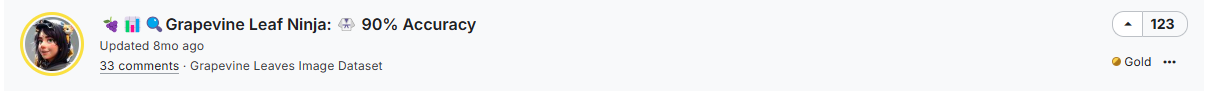

In [4]:
import os  # Operating system interfaces
import pathlib
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library

import tensorflow as tf                                    # TensorFlow deep learning framework 
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization  
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [5]:
seed = 123  # You can use any integer value as the seed
data_path = r"D:\code_study\ML_CODE\dataSets\Grapevine_Leaves_Image_Dataset\Grapevine_Leaves_Image_Dataset"
data_path = pathlib.Path(data_path)

train_data = image_dataset_from_directory(
    data_path,
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32,
    validation_split=0.2,  # 20% of the data will be used for validation
    subset='training',  # Specify that this is the training subset
    seed=seed  # Add seed argument
)

validation_data = image_dataset_from_directory(
    data_path,
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32,
    validation_split=0.2,  # 20% of the data will be used for validation
    subset='validation',  # Specify that this is the validation subset
    seed=seed  # Add seed argument
)

train_data = train_data.map(lambda x, y: (x / 255.0, y))
validation_data = validation_data.map(lambda x, y: (x / 255.0, y))

Found 500 files belonging to 5 classes.
Using 400 files for training.
Found 500 files belonging to 5 classes.
Using 100 files for validation.


In [ ]:
# Path to the directory containing images
subPath = "Ak"
path = os.path.join(data_path, subPath)

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

In [23]:
#create model
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

In [24]:
conv_base.trainable = False

In [25]:
conv_base.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [34]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization(momentum=0.7, epsilon=1e-5))
model.add(Dropout(0.45))
model.add(Dense(220, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(120, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
#Early_Stopping
early_stopping = EarlyStopping(
    patience=10, 
    restore_best_weights=True,
)


In [40]:
# history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
history = model.fit(train_data, epochs=100, validation_data=validation_data, 
                    callbacks=early_stopping, workers=5)

Epoch 1/100
13/13 [==============================] - 9s 434ms/step - loss: 1.6860 - accuracy: 0.3303 - val_loss: 0.9737 - val_accuracy: 0.7000
Epoch 2/100
13/13 [==============================] - 5s 348ms/step - loss: 0.7057 - accuracy: 0.7288 - val_loss: 0.5827 - val_accuracy: 0.8000
Epoch 3/100
13/13 [==============================] - 5s 298ms/step - loss: 0.3883 - accuracy: 0.8868 - val_loss: 0.4735 - val_accuracy: 0.8700
Epoch 4/100
13/13 [==============================] - 5s 291ms/step - loss: 0.3004 - accuracy: 0.9164 - val_loss: 0.4271 - val_accuracy: 0.8600
Epoch 5/100
13/13 [==============================] - 5s 312ms/step - loss: 0.1859 - accuracy: 0.9584 - val_loss: 0.3527 - val_accuracy: 0.8800
Epoch 6/100
13/13 [==============================] - 5s 289ms/step - loss: 0.1933 - accuracy: 0.9559 - val_loss: 0.3107 - val_accuracy: 0.9300
Epoch 7/100
13/13 [==============================] - 5s 295ms/step - loss: 0.1445 - accuracy: 0.9506 - val_loss: 0.3470 - val_accuracy: 0.8900

In [41]:
# Evaluate the model on the validation data
evaluation = model.evaluate(validation_data)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

4/4 [==============================] - 2s 261ms/step - loss: 0.2179 - accuracy: 0.9500
Validation Loss: 0.2179410755634308
Validation Accuracy: 0.949999988079071


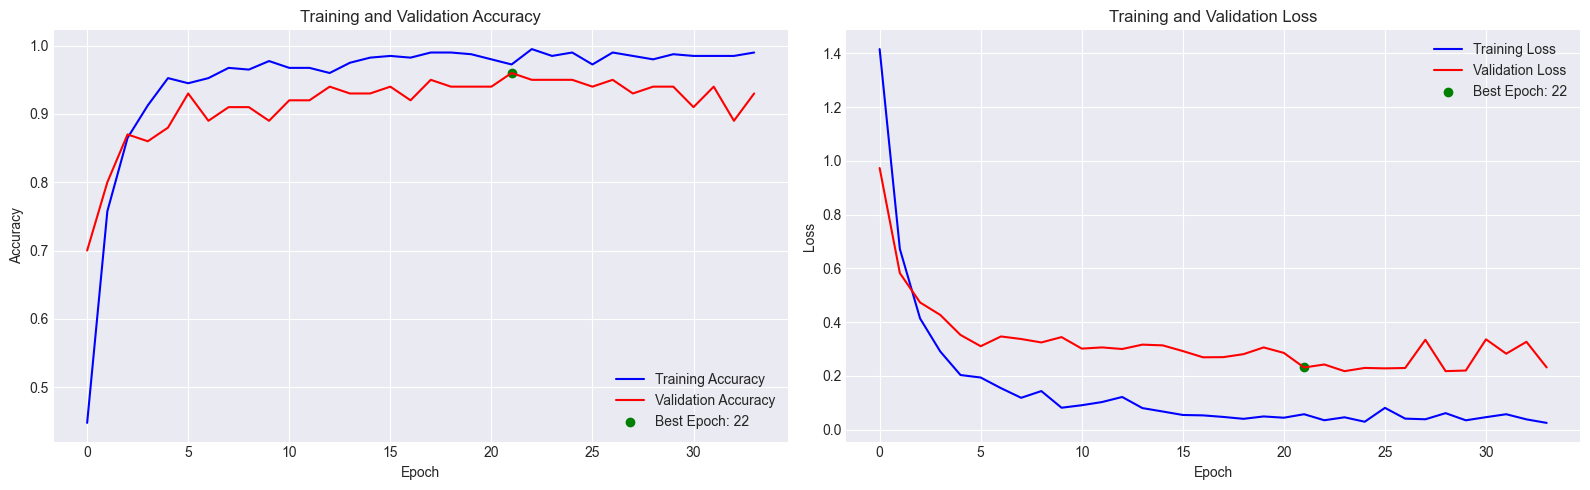

In [42]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [97]:
dict_class = {'Ak':0, 'Ala_Idris':1, 'Buzgulu': 2, 'Dimnit': 3, 'Nazli': 4}

In [98]:
main_path = "D:\code_study\ML_CODE\dataSets\Grapevine_Leaves_Image_Dataset\Grapevine_Leaves_Image_Dataset"
main_path = main_path.replace("\\", "/")
path_Ak = main_path + '/Ak'
path_Ala_Idris = main_path + '/Ala_Idris'
path_Buzgulu = main_path + '/Buzgulu'
path_Dimnit = main_path + '/Dimnit'
path_Nazli = main_path + '/Nazli'

In [99]:
import pandas as pd
main_df = pd.DataFrame()
main_df['images'] = os.listdir(path_Ak) + os.listdir(path_Ala_Idris) + os.listdir(path_Buzgulu) + os.listdir(path_Dimnit) + os.listdir(path_Nazli)
main_df

,images
0,Ak (1).png
1,Ak (10).png
2,Ak (100).png
3,Ak (11).png
4,Ak (12).png
...,...
495,Nazli (95).png
496,Nazli (96).png
497,Nazli (97).png
498,Nazli (98).png


In [100]:
classes = []
paths = []
for image in main_df['images']:
    class_ = image.split(' (')[0]
    classes.append(class_)
    paths.append(main_path+class_+'/'+image)

main_df['classes'] = classes
main_df['path'] = paths
main_df

,images,classes,path
0,Ak (1).png,Ak,D:/code_study/ML_CODE/dataSets/Grapevine_Leave...
1,Ak (10).png,Ak,D:/code_study/ML_CODE/dataSets/Grapevine_Leave...
2,Ak (100).png,Ak,D:/code_study/ML_CODE/dataSets/Grapevine_Leave...
3,Ak (11).png,Ak,D:/code_study/ML_CODE/dataSets/Grapevine_Leave...
4,Ak (12).png,Ak,D:/code_study/ML_CODE/dataSets/Grapevine_Leave...
...,...,...,...
495,Nazli (95).png,Nazli,D:/code_study/ML_CODE/dataSets/Grapevine_Leave...
496,Nazli (96).png,Nazli,D:/code_study/ML_CODE/dataSets/Grapevine_Leave...
497,Nazli (97).png,Nazli,D:/code_study/ML_CODE/dataSets/Grapevine_Leave...
498,Nazli (98).png,Nazli,D:/code_study/ML_CODE/dataSets/Grapevine_Leave...


In [101]:
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.activations import ExtractActivations
import cv2
import numpy as np
def gradcam_visualise(data, model, class_index):
    explainer = GradCAM()
    output = explainer.explain(data, model, class_index=class_index)
    return output

def activation_visualise(image, model, layers):
    explainer = ExtractActivations()
    output = explainer.explain([image], model, layers_name=layers)
    return output

In [102]:
def plot_data_four(class_name, outputs):
    fig = plt.figure(figsize=(8, 8))
    plt.suptitle(class_name)
    plt.subplot(2,2,1)
    plt.imshow(outputs[0])
    plt.subplot(2,2,2)
    plt.imshow(outputs[1])
    plt.subplot(2,2,3)
    plt.imshow(outputs[2])
    plt.subplot(2,2,4)
    plt.imshow(outputs[3])
    plt.show()

In [108]:
def activations_model(model, df_exp, class_name, pre_process_input, layers):
    output_data = []
    classes_df = df_exp[df_exp['classes'] ==  class_name].reset_index(drop = True)
    for idx,i in enumerate(np.random.choice(df_exp['path'],4)):
        image = cv2.imread(i)
        image = cv2.resize(image, (227,227))
        image = pre_process_input(image)
        image = tf.expand_dims(image, axis=0)
        output = activation_visualise([image], model, layers)
        output_data.append(output)
    plot_data_four(class_name, output_data)

In [104]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [105]:
main_df['classes'].unique()
main_df.path[0]

'D:/code_study/ML_CODE/dataSets/Grapevine_Leaves_Image_Dataset/Grapevine_Leaves_Image_DatasetAk/Ak (1).png'

In [106]:
def grad_cam(model, df_exp, class_name, pre_process_input, class_index):
    output_data = []
    classes_df = df_exp[df_exp['classes'] ==  class_name].reset_index(drop = True)
    for idx,i in enumerate(np.random.choice(df_exp['path'],4)):
        image = cv2.imread(i)
        image = cv2.resize(image, (227,227))
        image = pre_process_input(image)
        data = ([image], None)
        output = gradcam_visualise(data, model, class_index)
        output_data.append(output)
    plot_data_four(class_name, output_data)
for class_name in main_df['classes'].unique():
    grad_cam(model, main_df, class_name, preprocess_input, dict_class[class_name])

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [107]:
for class_name in main_df['classes'].unique():
    activations_model(model, main_df, class_name, preprocess_input, [model.layers[-3].name])

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
